In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure

(128, 128, 4)


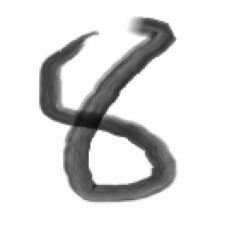

In [4]:
# loading the sample data
img = imread('../Data/test_8.png')

# resizing the image
resized_img = resize(img, (128,128)) 
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

In [8]:
# Feature Extraction 1: Histogram of Gradient (HOG)

fd, hog = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

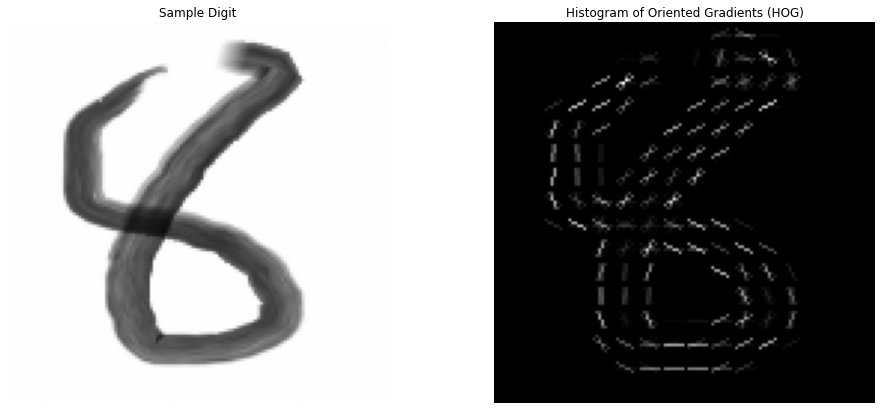

In [9]:
# HOG visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Sample Digit')
ax1.axis("off")

hog_panda_rescaled = exposure.rescale_intensity(hog, in_range=(0, 10)) 

ax2.imshow(hog_panda_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients (HOG)')
ax2.axis("off")

plt.savefig("hog.png", dpi=125)
plt.show()

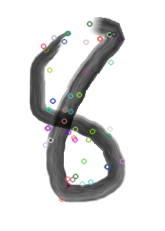

In [3]:
# Feature Extraction 2: SIFT Corner Detection

img = cv2.imread('../Data/test_8.png')
sift = cv2.SIFT_create()
key_points = sift.detect(img, None)

img_ = cv2.drawKeypoints(img, key_points, img)

plt.axis('off')
plt.imshow(img_)

In [ ]:
# Feature Extraction 3: Neural Network

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output